<a href="https://colab.research.google.com/github/Markan281/misp/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nazwa zadania:**

Ceny domów: Zaawansowane techniki regresji. Przewidywane cen domów.

# **Opis zadania:**

Wiele potencjalnych kupców, którzy rozglądają się za nowym lokum zazwyczaj biorą pod uwagę rzeczy błahe, które nie wpływają znacznie na cenę domu, ale dla nich samych stanowią klucz do wyboru.  Są też tacy kupujący, którzy orientują się w kilku najbardziej podstawowych kryteriach jakie mają wpływ na wysokość ceny domu. Są to czynniki takie jak lokalizacja, metraż czy surowiec jaki został użyty do budowy. Nie wiele osób zagłębia się w pozostałe mniej powszechne czynniki jakie sprawiają, że właściciel wycenia dom na daną sumę. Im więcej czynników domu wyszczególnimy tym dokładniej jesteśmy w stanie oszacować cenę domu. W tym zadaniu brane pod uwagę będzie znacznie więcej niż nowicjusz jest w stanie ocenić własnym okiem. 

# **Cel:**

Celem eksperymentu jest przewidzenie poszczególne cechy domów wpływają na ich ostateczną cenę.


# **Więcej informacji:**


Więcej informacji na temat tego konkursu można znaleźć na stronie :[Strona konkursu](https://https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description)




In [80]:
#Pliki CSV są takie same jak użyte w kursie MachineLearning pobieramy pliki do google colab.

import pandas as pd
import numpy as np
import io
from google.colab import files

train = files.upload()
train_path = io.BytesIO(train['train.csv'])
train_data = pd.read_csv(train_path)

test = files.upload()
test_path = io.BytesIO(test['test.csv'])
test_data = pd.read_csv(test_path)

Saving train.csv to train (2).csv


Saving test.csv to test (2).csv


# **Przedstawienie danych**
Porównując ilość kolumn widzimy, że dane uczące mają ich **81** natomiast dane testujące **80** wynika to z faktu, iż nie zawierają cen, które mamy przewidzieć.

In [81]:
print ("Ilość danych uczących:", train_data.shape)
print ("Ilość danych weryfikujących:", test_data.shape)

Ilość danych uczących: (1460, 81)
Ilość danych weryfikujących: (1459, 80)


W celu uściślenia o jakich cecha domów mówiłem na początku, postanowiłem pokazać je w tabeli.

In [82]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
#Importuje bibliotek do wykresów
import matplotlib.pyplot as plot

# **Korelacje**

Sprawdzam teraz wpływ poszczególnych cech na cenę wyjściową.

In [84]:
#Metoda select_dtypes will return a subset of columns matching the specified data types.
CechyNumerycznie = train_data.select_dtypes(include=[np.number])
CechyNumerycznie.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

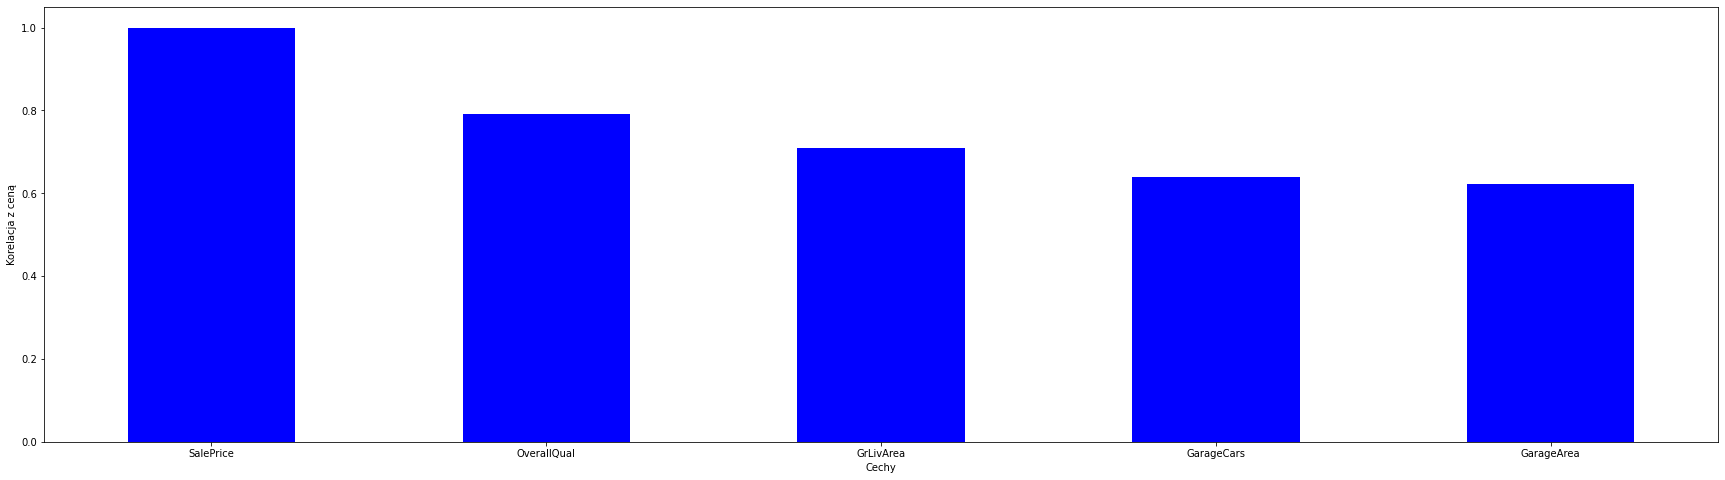

In [85]:
#Teraz wyświetlam skorelowane najbardziej z ceną cechy
Korelacja = CechyNumerycznie.corr()

NajbardziejWplywajacoDodatnioCechy = Korelacja['SalePrice'].sort_values(ascending=False)[:5]

NajbardziejWplywajacoDodatnioCechy.plot(kind='bar', color='blue')
plot.xlabel('Cechy')
plot.ylabel('Korelacja z ceną')
plot.xticks(rotation=0)
plot.show()


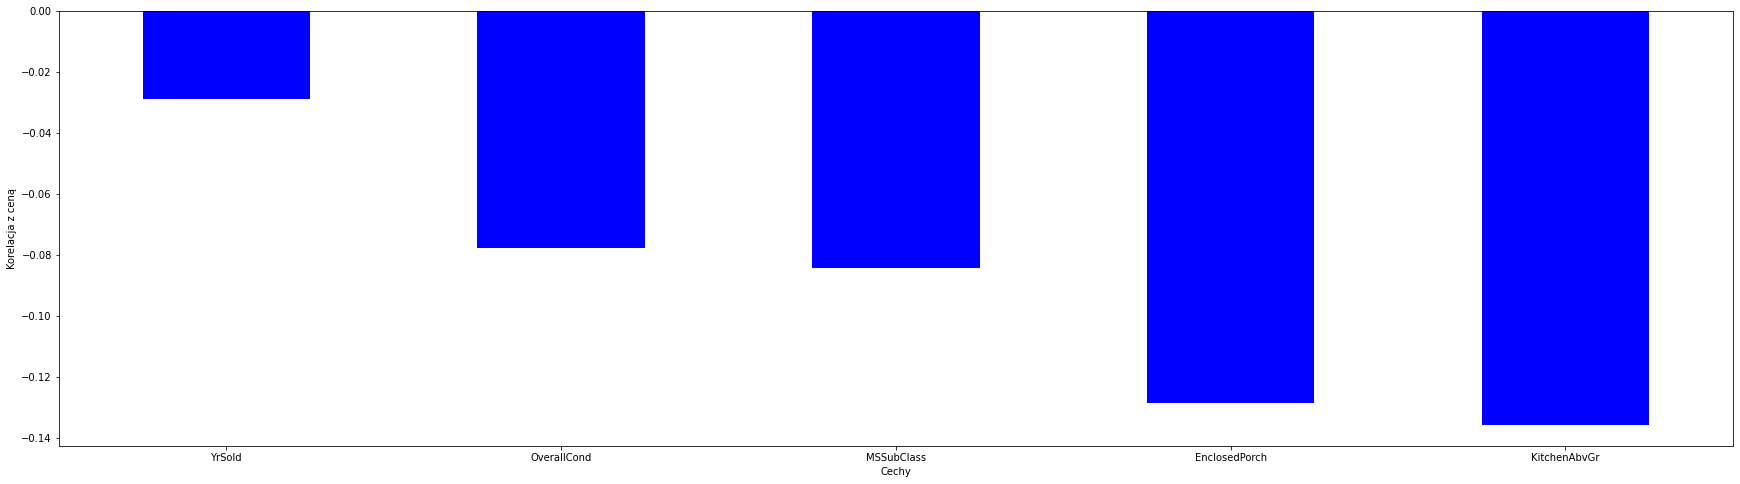

In [86]:
#Teraz wyświetlam skorelowane najbardziej negatywnie cechy domów
NajbardziejWplywajacoUjemnoCechy = Korelacja['SalePrice'].sort_values(ascending=False)[-5:]

NajbardziejWplywajacoUjemnoCechy.plot(kind='bar', color='blue')
plot.xlabel('Cechy')
plot.ylabel('Korelacja z ceną')
plot.xticks(rotation=0)
plot.show()


# **Wyświetlanie danych**
Na tym etapie będę sprawdzał poszczególne cechy, które wpływają na ceny domów i lekko je dostosowywał.

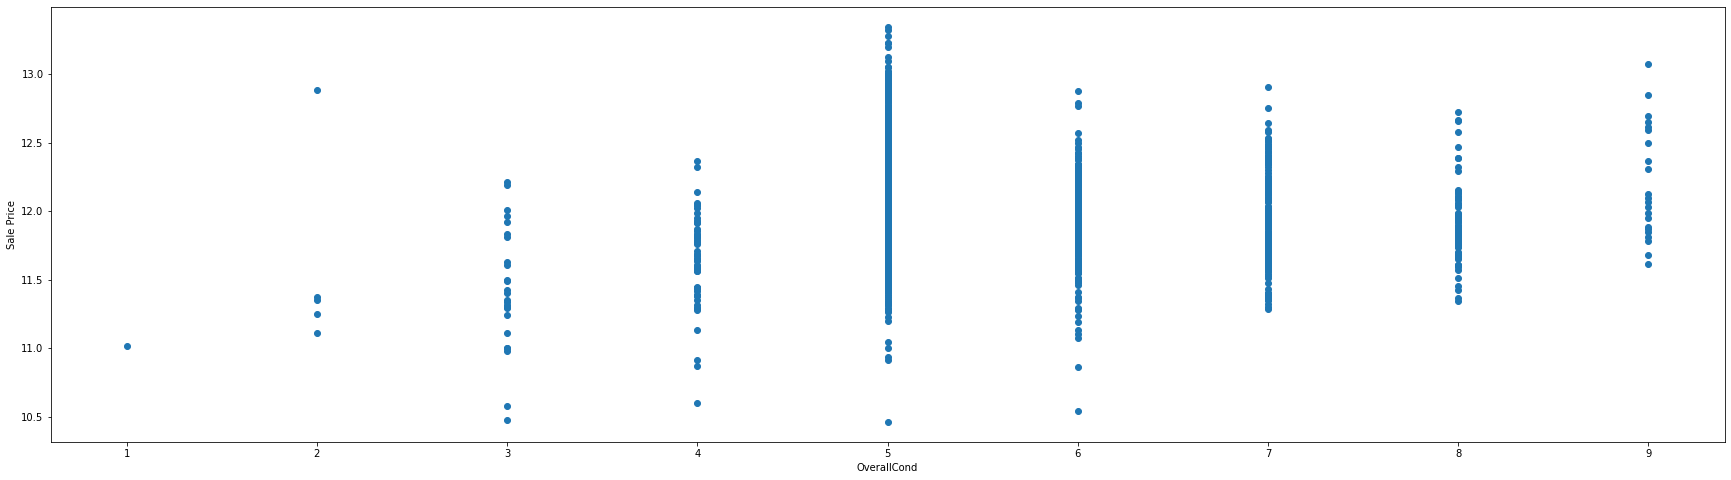

In [94]:
#Analiza najważniejszych cech domu
target = np.log(train_data.SalePrice)
plot.scatter(x=train_data['OverallCond'], y=target)
plot.ylabel('Sale Price')
plot.xlabel('OverallCond')
plot.show()

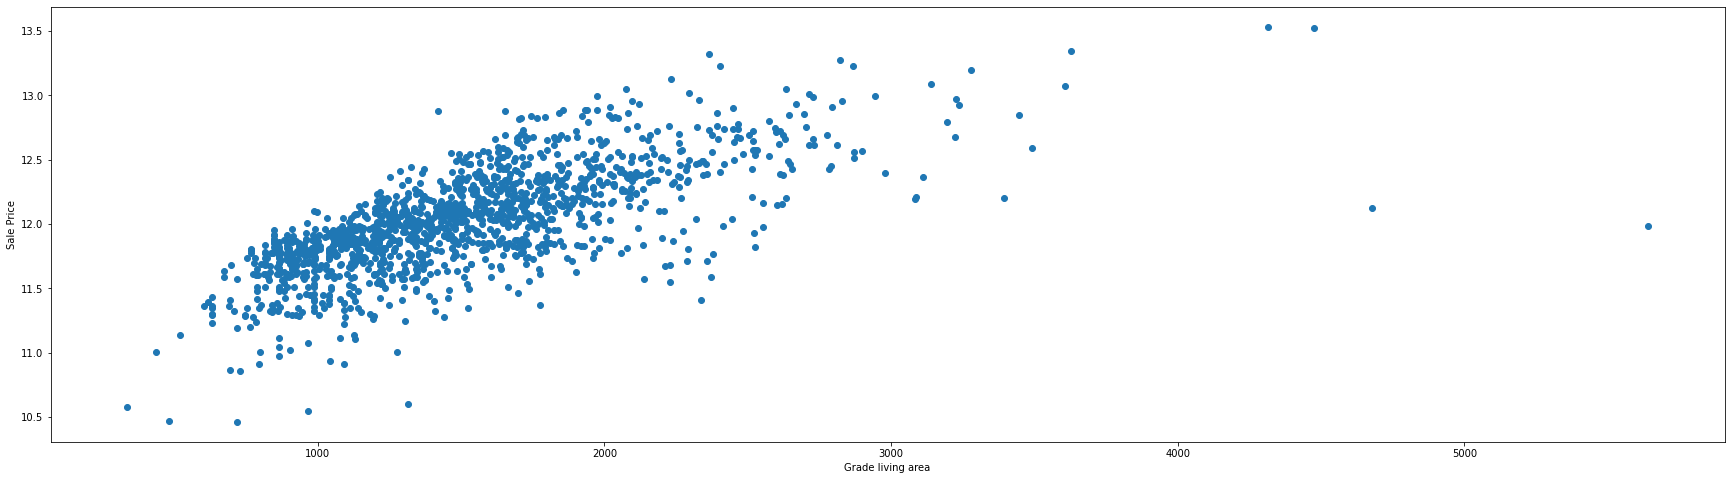

In [87]:

plot.scatter(x=train_data['GrLivArea'], y=np.log(train_data.SalePrice))
plot.ylabel('Sale Price')
plot.xlabel('Grade living area')
plot.show()

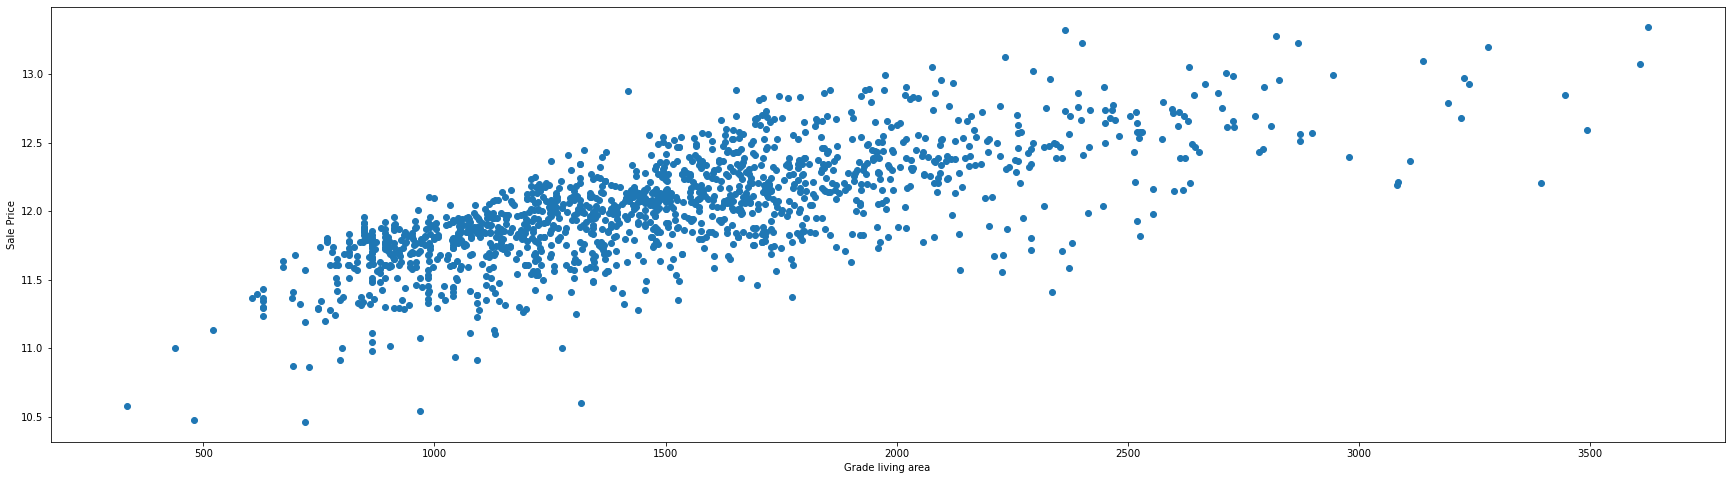

In [89]:
#Usuwam dwie ostatnie wartości bo mocno odbiegają od liniowości
train_data = train_data[train_data['GrLivArea'] < 3800]
plot.scatter(x=train_data['GrLivArea'], y=np.log(train_data.SalePrice))
plot.ylabel('Sale Price')
plot.xlabel('Grade living area')
plot.show()

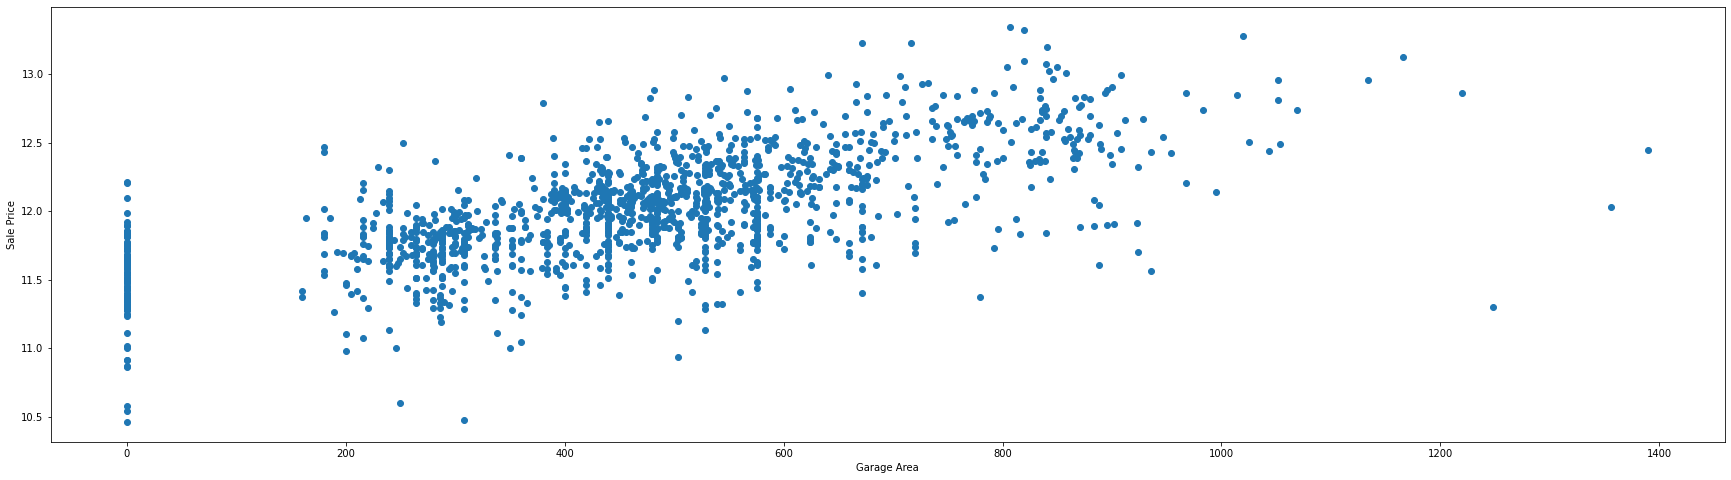

In [91]:
plot.scatter(x=train_data['GarageArea'], y=np.log(train_data.SalePrice))
plot.ylabel('Sale Price')
plot.xlabel('Garage Area')
plot.show()

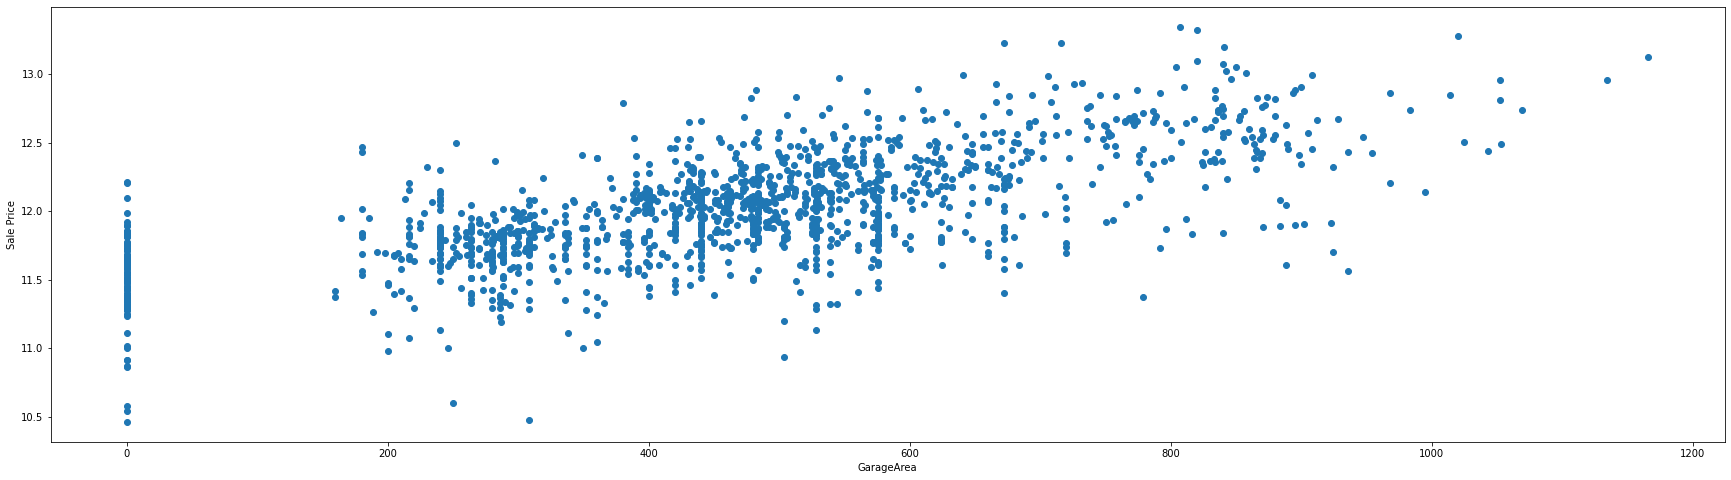

In [92]:
#Usuwam cztery ostatnie wartości bo mocno odbiegają od liniowości
train_data = train_data[train_data['GarageArea'] < 1200]
plot.scatter(x=train_data['GarageArea'], y=np.log(train_data.SalePrice))
plot.ylabel('Sale Price')
plot.xlabel('GarageArea')
plot.show()

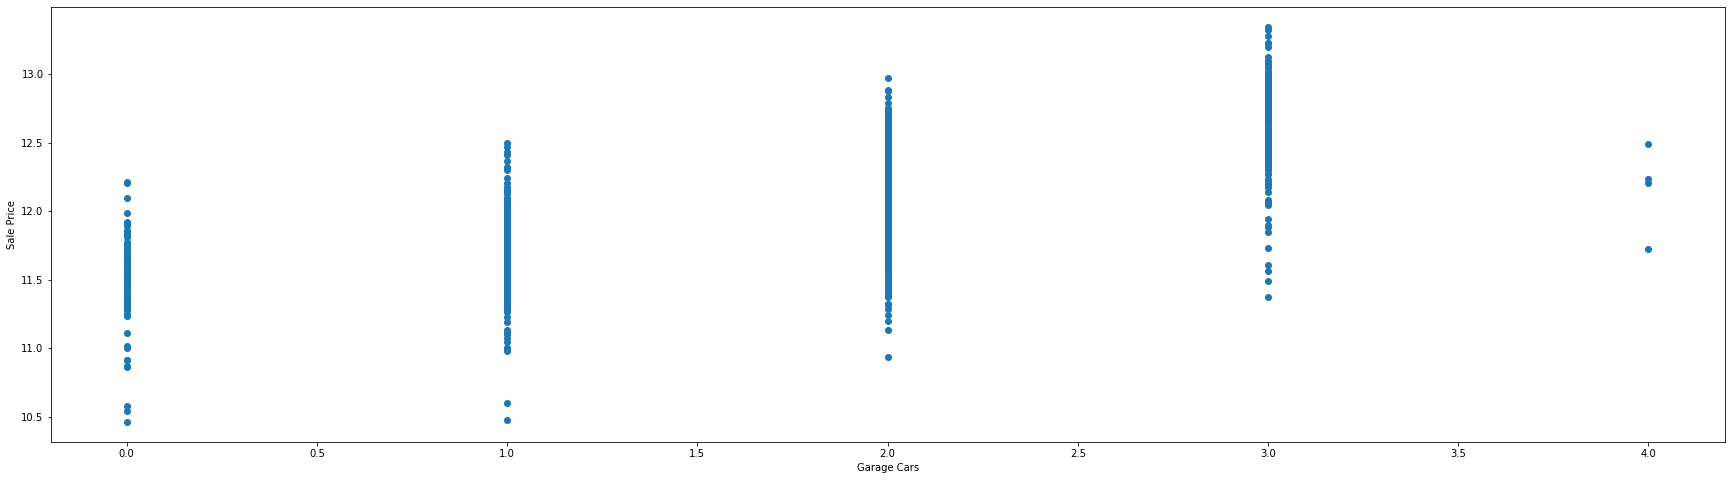

In [93]:
#Te dane wydają się być dobrze oddające zasade problemu w związku z tym ich nie zmieniam
plot.scatter(x=train_data['GarageCars'], y=np.log(train_data.SalePrice))
plot.ylabel('Sale Price')
plot.xlabel('Garage Cars')
plot.show()

In [96]:
#W przypadku braku informacji danej kategorii zastepuje ją wartością średnią.
data = train_data.select_dtypes(include=[np.number]).interpolate().dropna()
#Weryfikacja ile pozostało pustych wartości
sum(data.isnull().sum() != 0)

0

# **Tworzenie liniowego modelu**



In [97]:
#Przypisujemy nasze dane do modelu
y = np.log(train_data.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=1, test_size=.15)
                         

In [106]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [107]:
model = lr.fit(X_train, y_train)

In [108]:
print ("Współczynnik dopasowania modelu do danych uczących: \n", model.score(X_test, y_test))

Współczynnik dopasowania modelu do danych uczących: 
 0.9020359310791327


In [109]:
predictions = model.predict(X_test)

In [110]:
from sklearn.metrics import mean_squared_error
print ('Średni błąd kwadratowy: \n', mean_squared_error(y_test, predictions))

Średni błąd kwadratowy: 
 0.01695704221491291


# **Prezentacja wyników**

W momencie kiedy wartości aktualne i przewidywane były by takie same otrzymalibyśmy linię prostą jak widać mamy tutaj rozbieżności. Rozbieżności te widać także w średnim błędzie kwadratowym jednak model dopsaował się w 90% co uznaje za sukces.

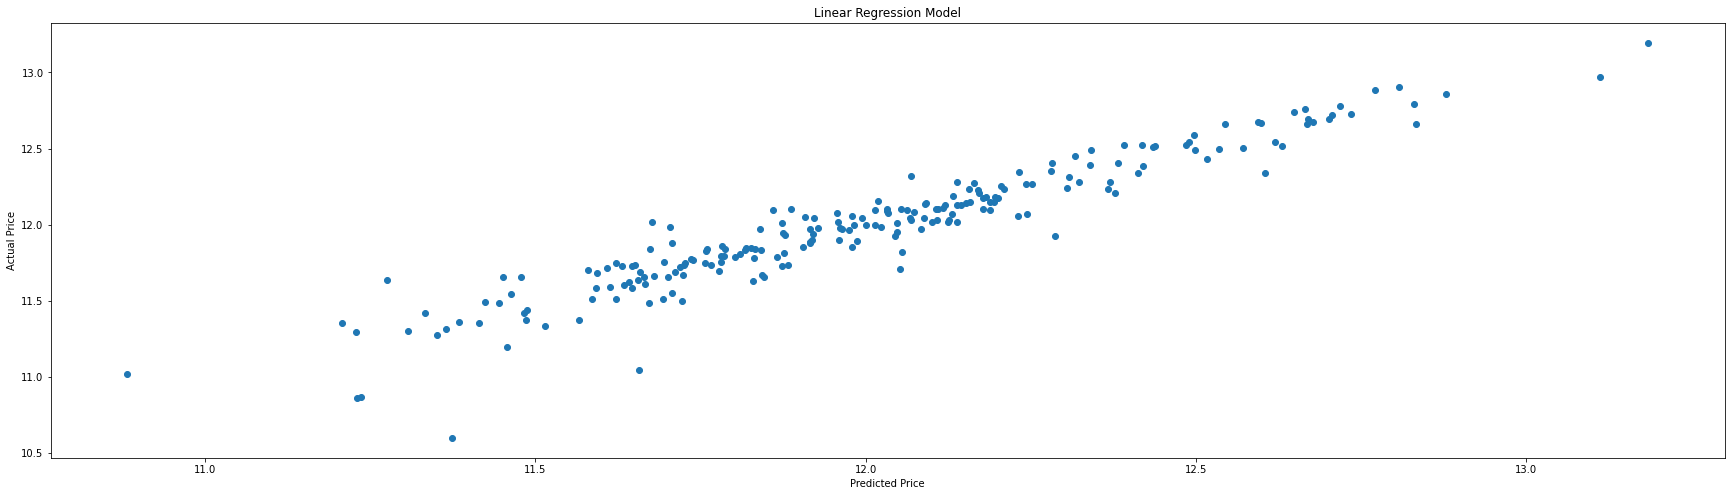

In [111]:
actual_values = y_test
plot.scatter(predictions, actual_values)
plot.xlabel('Predicted Price')
plot.ylabel('Actual Price')
plot.title('Linear Regression Model')
plot.show()